In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
lemm = WordNetLemmatizer()
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18
nltk.download('all')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammar

True

In [3]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/nlp2/data.json", orient="columns")
df

,comment_text,toxic
0,U created Requests for Scholarlyarticles is aw...,1
1,in looking at the LGBT professions categories ...,1
2,New York City regulation Regarding the removal...,0
3,Thank you for the speedy rollback Would you be...,1
4,If you want to talk about this stuff Then pe...,0
...,...,...
312730,Partido name All Partidos of Buenos Aires Prov...,1
312731,"A Little Doubt Hi Matthew, long time no I have...",0
312732,"Accor Hello, there is a new Accor logo as of S...",0
312733,Just wondering if EhuangZhang d00d simply base...,0


In [4]:
df["comment_text"] = df["comment_text"].str.lower()
df.head()

,comment_text,toxic
0,u created requests for scholarlyarticles is aw...,1
1,in looking at the lgbt professions categories ...,1
2,new york city regulation regarding the removal...,0
3,thank you for the speedy rollback would you be...,1
4,if you want to talk about this stuff then pe...,0


In [5]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df["comment_text"] = df["comment_text"].apply(lambda x: remove_stopwords(x))

In [6]:
df

,comment_text,toxic
0,u created requests scholarlyarticles awaiting ...,1
1,looking lgbt professions categories point get ...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aires province wi...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [7]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["comment_text"] = df["comment_text"].apply(lambda x: lemmatize(x))
df

,comment_text,toxic
0,u created request scholarlyarticles awaiting c...,1
1,looking lgbt profession category point get beh...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aire province wik...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [8]:
df["comment_text"] = df["comment_text"].str.strip()

In [9]:
df

,comment_text,toxic
0,u created request scholarlyarticles awaiting c...,1
1,looking lgbt profession category point get beh...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aire province wik...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [10]:
df.isna().sum()

comment_text    0
toxic           0
dtype: int64

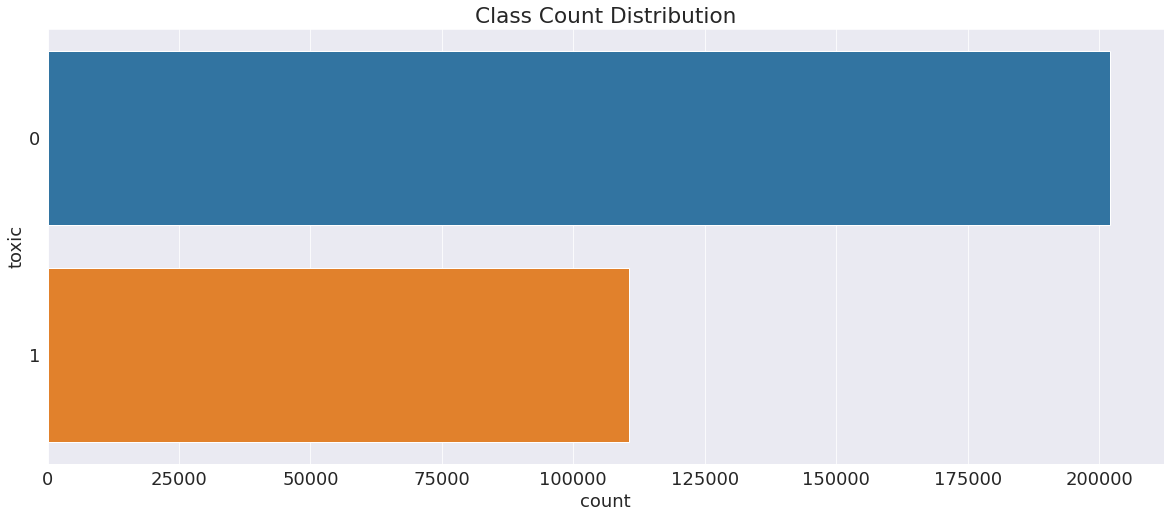

In [11]:
sns.countplot(data=df,y='toxic')
plt.title("Class Count Distribution")
plt.show()

In [12]:
toxic = df.loc[df['toxic'] == 1, 'comment_text'].tolist()
non_toxic = df.loc[df['toxic'] == 0, 'comment_text'].tolist()

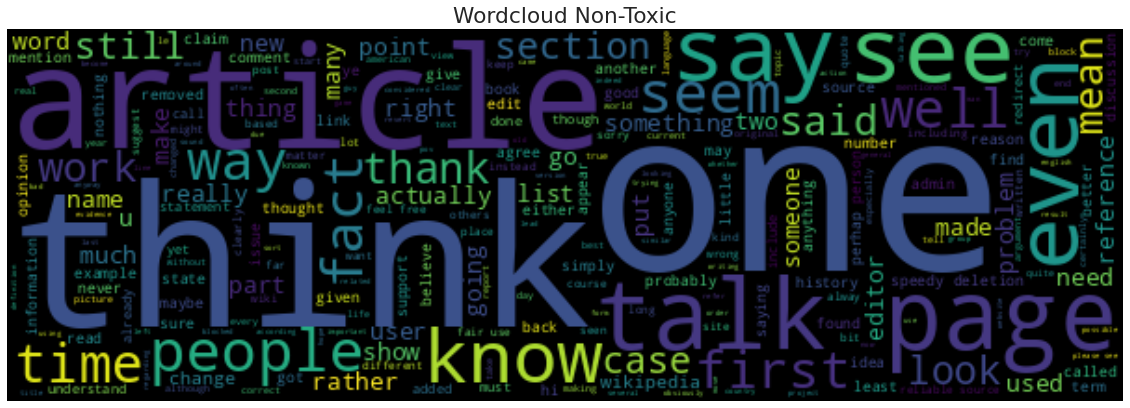

In [13]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(non_toxic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud Non-Toxic")
plt.axis("off")
plt.show()

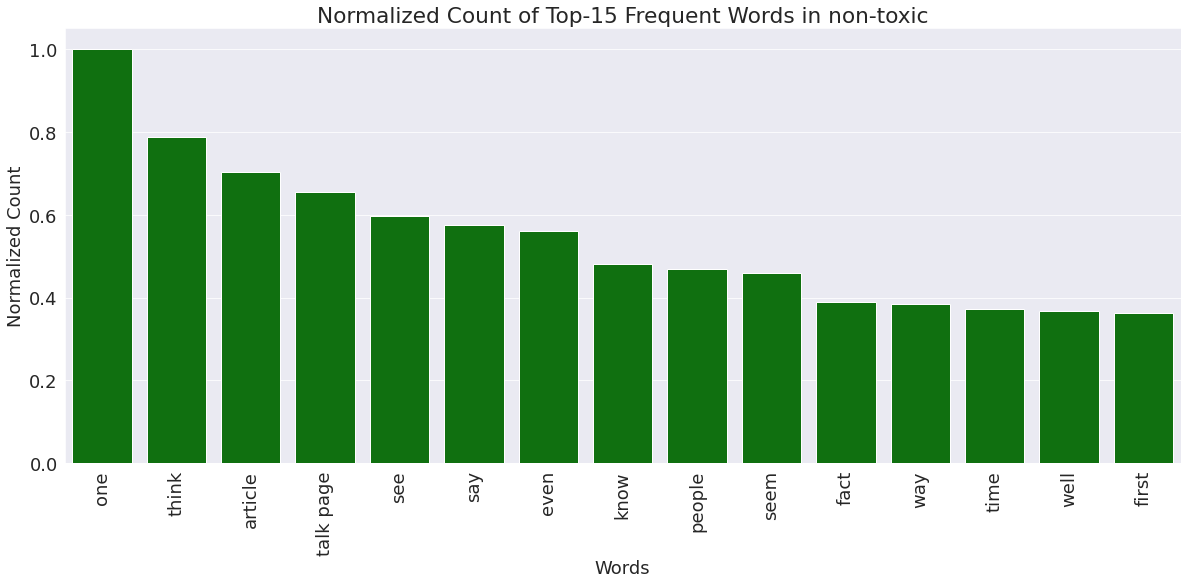

In [14]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words in non-toxic")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

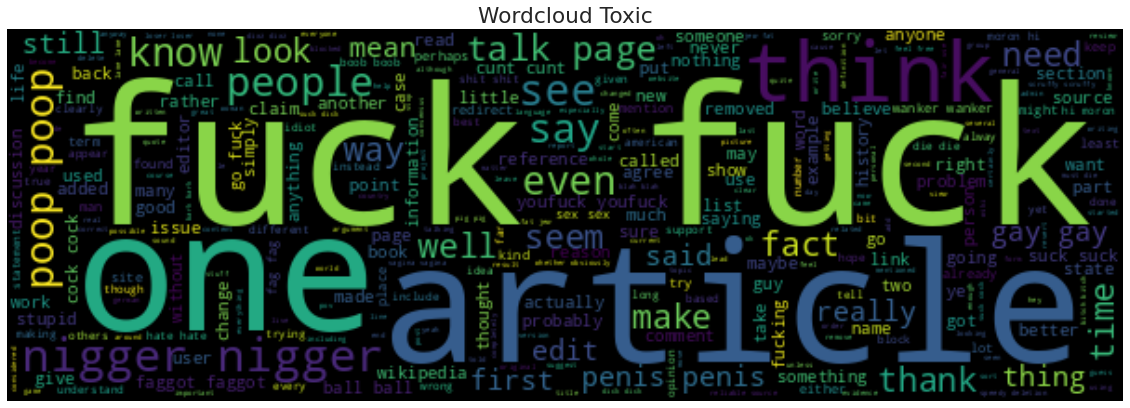

In [15]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(toxic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud Toxic")
plt.axis("off")
plt.show()

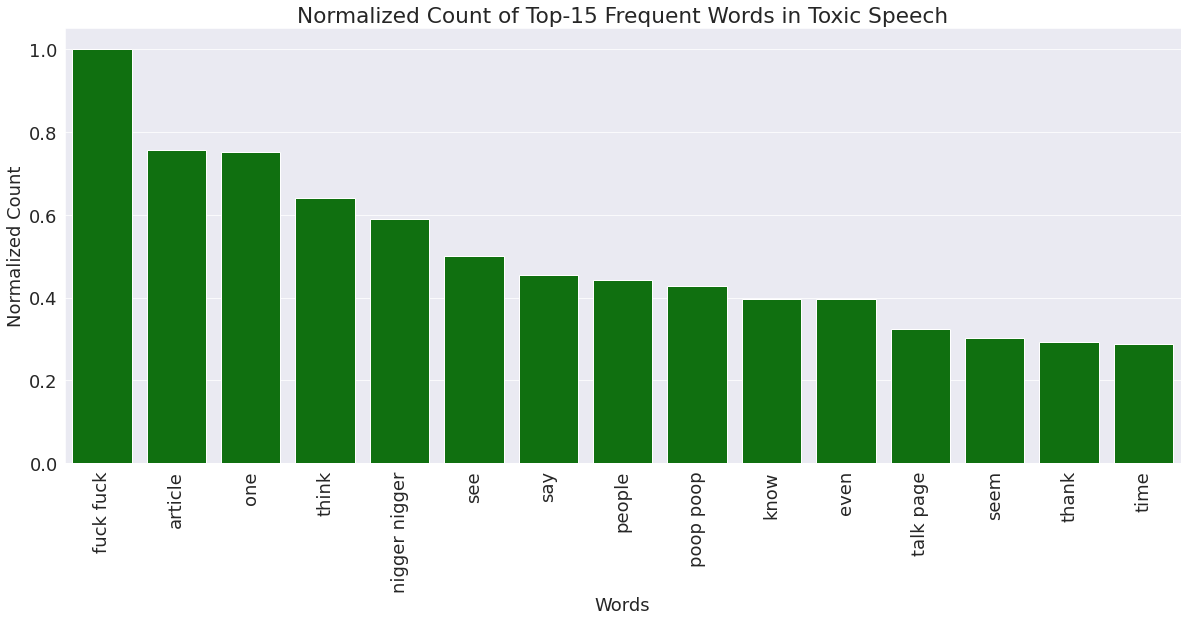

In [16]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words in Toxic Speech")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

In [17]:
df['sentence_lengths'] = df['comment_text'].progress_apply(lambda x: len(x.split()))

100%|██████████| 312735/312735 [00:00<00:00, 456357.99it/s]


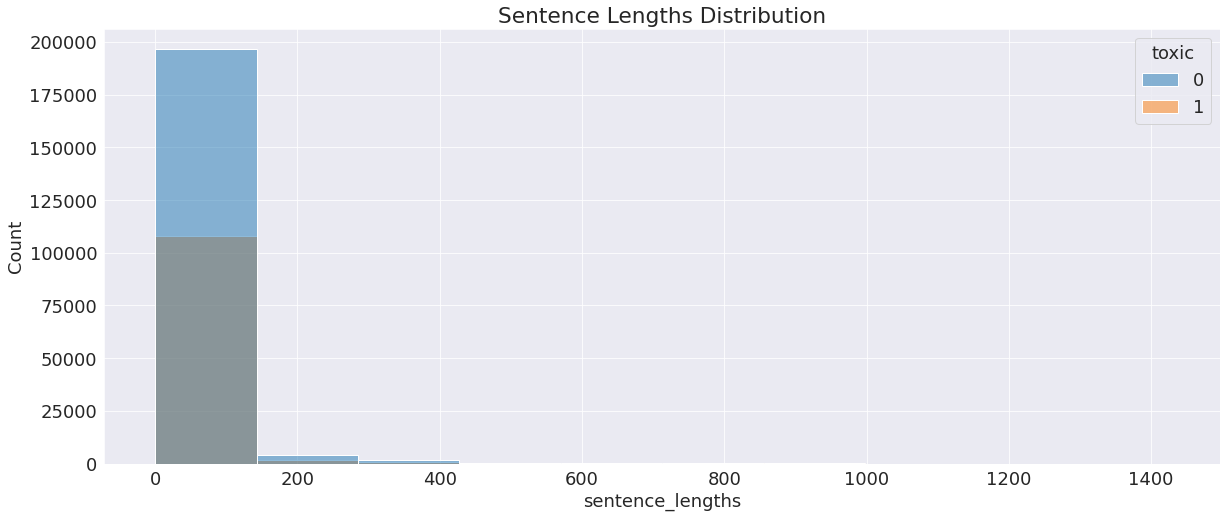

In [18]:
sns.histplot(data=df,x='sentence_lengths',hue='toxic',bins=10, element='bars')
plt.title("Sentence Lengths Distribution")
plt.show()


In [19]:
df["sentence_lengths"].describe()

count    312735.000000
mean         28.739757
std          49.602794
min           0.000000
25%           6.000000
50%          14.000000
75%          31.000000
max        1426.000000
Name: sentence_lengths, dtype: float64

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['toxic_encoded'] = le.fit_transform(df['toxic'])

In [21]:
df

,comment_text,toxic,sentence_lengths,toxic_encoded
0,u created request scholarlyarticles awaiting c...,1,7,1
1,looking lgbt profession category point get beh...,1,19,1
2,"new york city regulation regarding removal, , ...",0,15,0
3,thank speedy rollback would believe first time...,1,21,1
4,want talk stuff perfectly willing refer commen...,0,62,0
...,...,...,...,...
312730,partido name partidos buenos aire province wik...,1,26,1
312731,"little doubt hi matthew, long time new doubt, ...",0,17,0
312732,"accor hello, new accor logo september changed ...",0,11,0
312733,wondering ehuangzhang d00d simply based appear...,0,30,0


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
X = vectorizer.fit_transform(df["comment_text"].values.tolist()).toarray()
y = df['toxic_encoded'].values

In [31]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=99)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35964, 2500)
X_test shape: (8991, 2500)
y_train shape: (35964,)
y_test shape: (8991,)


In [ ]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(accuracy_score(y_train,y_pred_tr))
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g',
            xticklabels=['Negative','Positive', 'Neutral'],yticklabels=['Negative','Positive', 'Neutral'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

## Naive Bayes:

--------------------Training Performance---------------------
0.690551662773885
              precision    recall  f1-score   support

           0       0.70      0.73      0.72     13638
           1       0.72      0.29      0.41      6651
           2       0.68      0.83      0.74     15675

    accuracy                           0.69     35964
   macro avg       0.70      0.61      0.62     35964
weighted avg       0.70      0.69      0.67     35964

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.6671115560004449
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3393
           1       0.69      0.24      0.36      1681
           2       0.66      0.82      0.73      3917

    accuracy                           0.67      8991
   macro avg       0.67      0.59      0.59      8991
weighted avg       0.67      0.67      0.64      8991



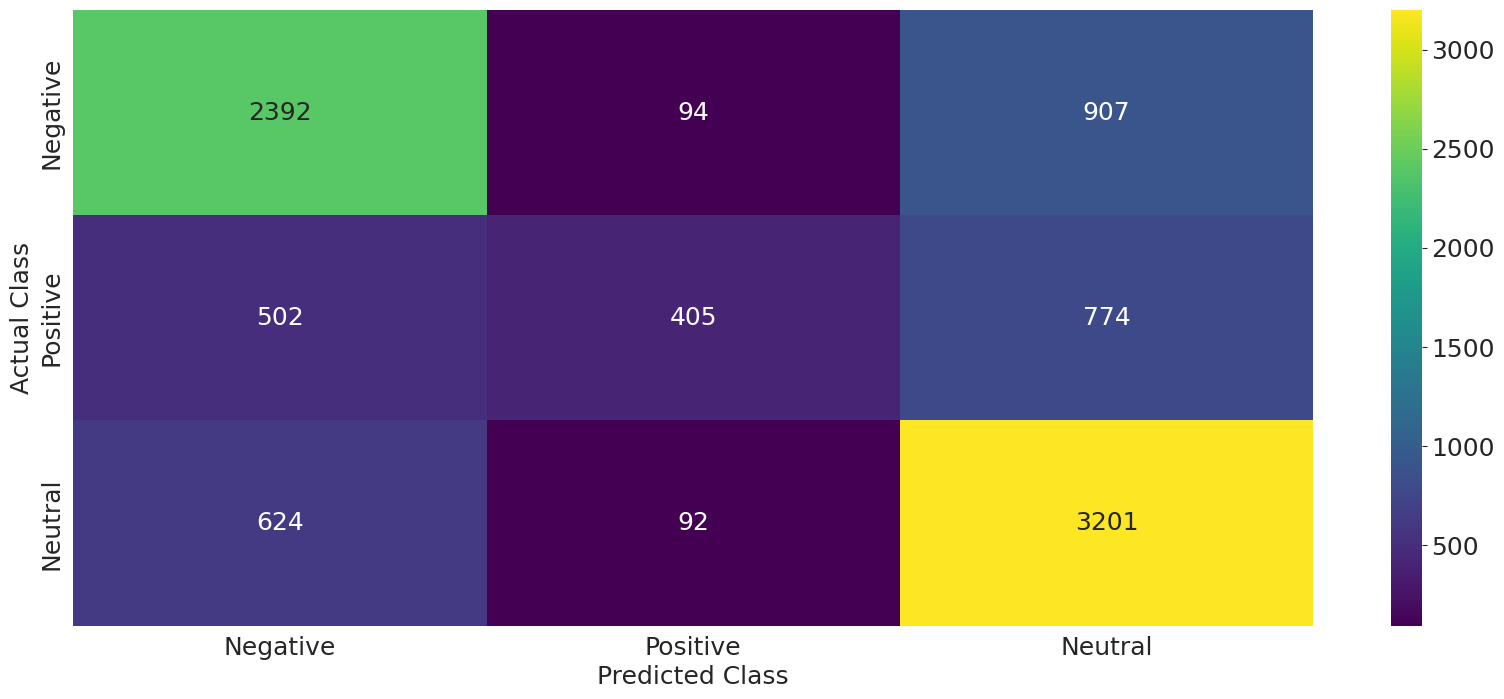

In [ ]:
modelNB = MultinomialNB()
model_train(modelNB, X_train, X_test, y_train, y_test)

## Logistic Regression (Best Model) :

--------------------Training Performance---------------------
0.8133967300633967
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     13638
           1       0.76      0.72      0.74      6651
           2       0.84      0.86      0.85     15675

    accuracy                           0.81     35964
   macro avg       0.80      0.79      0.80     35964
weighted avg       0.81      0.81      0.81     35964

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.7666555444333222
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3393
           1       0.67      0.63      0.65      1681
           2       0.80      0.82      0.81      3917

    accuracy                           0.77      8991
   macro avg       0.75      0.74      0.74      8991
weighted avg       0.77      0.77      0.77      8991



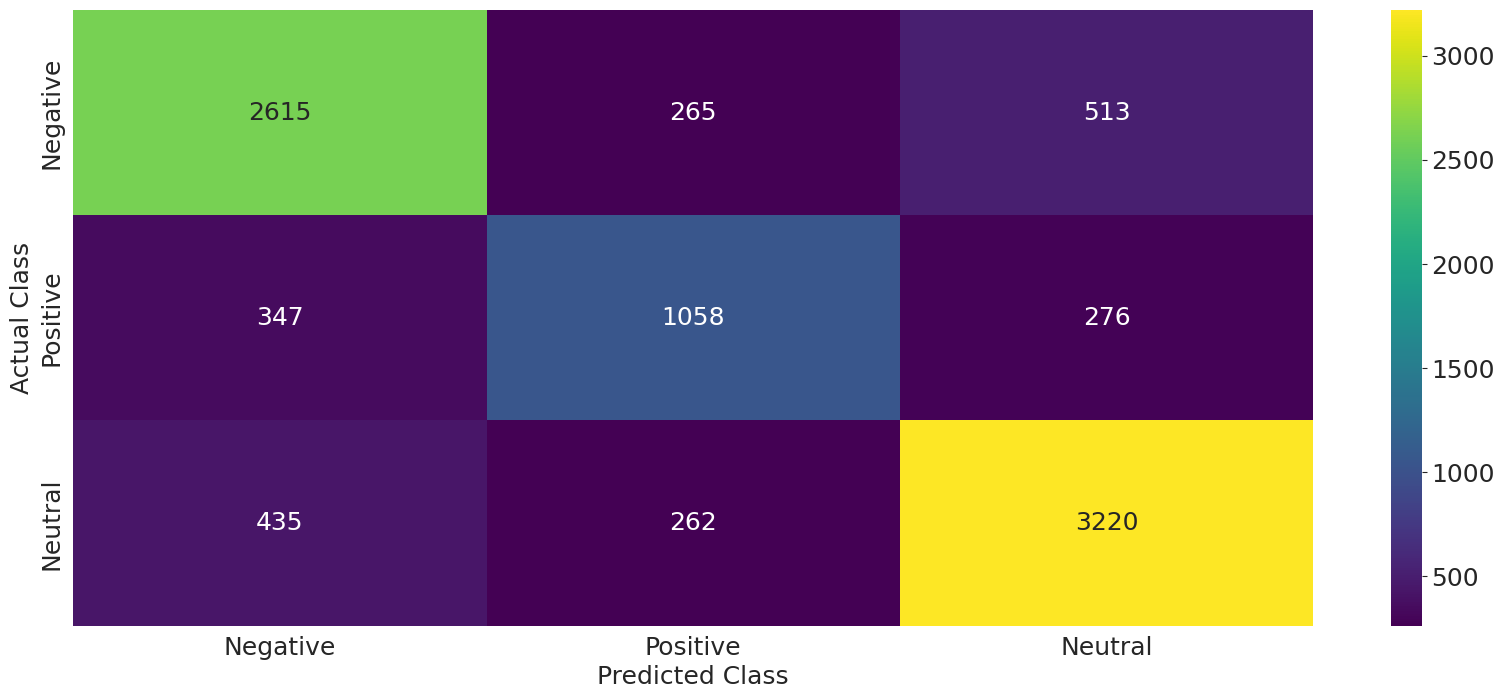

In [ ]:
modelLR = LogisticRegression(max_iter=1000)
model_train(modelLR, X_train, X_test, y_train, y_test)

## Random forest:

--------------------Training Performance---------------------
0.6189800912023135
              precision    recall  f1-score   support

           0       0.83      0.55      0.66     13638
           1       0.93      0.01      0.01      6651
           2       0.55      0.94      0.69     15675

    accuracy                           0.62     35964
   macro avg       0.77      0.50      0.46     35964
weighted avg       0.73      0.62      0.55     35964

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.5953731509287065
              precision    recall  f1-score   support

           0       0.78      0.52      0.62      3393
           1       0.75      0.01      0.01      1681
           2       0.53      0.91      0.67      3917

    accuracy                           0.60      8991
   macro avg       0.69      0.48      0.44      8991
weighted avg       0.67      0.60      0.53      8991



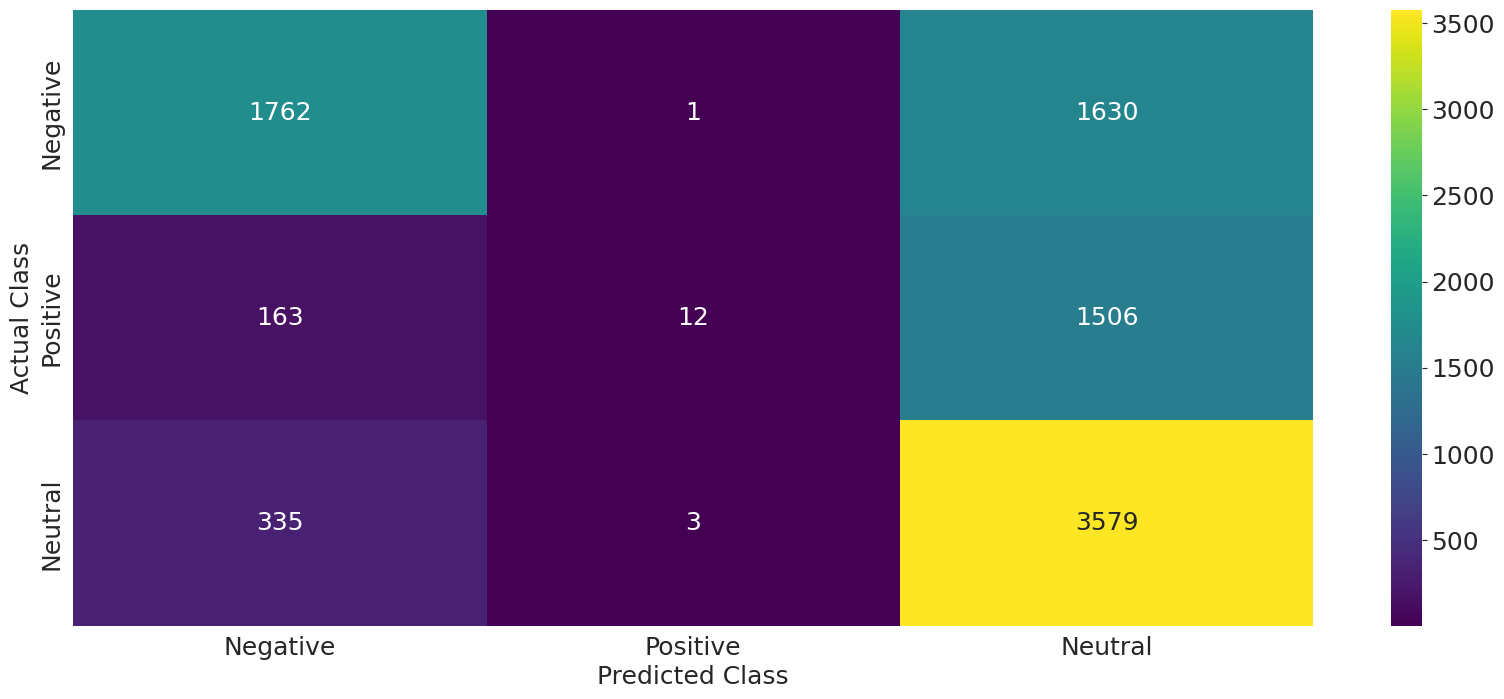

In [ ]:
model = RandomForestClassifier(n_estimators=100,max_depth=15,max_features='sqrt')
model_train(model, X_train, X_test, y_train, y_test)